In this notebook I will be performing regression using `pyglm.py` with simulated data for a couple of probability distributions.
### Import libraries

In [7]:
import numpy as np
import random
import pyglm as glm
import matplotlib.pyplot as plt

### Gaussian Distribution

Let $Y \sim N(\mu,\sigma^2)$, where the canonical link function is defined as $ \mu = X\beta$

In [8]:
# Simulate a line with Gaussian noise
m = 0.5
b = 1
X = 1 * np.linspace(1,100,100)

noise = np.zeros(100)
for i in range(0,100):
    noise[i] = random.normalvariate(0,2)

y = m * X + b + noise

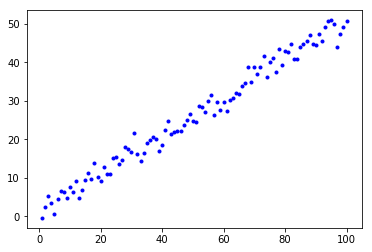

In [9]:
plt.scatter(X, y, marker='.', color='b')
plt.show()


In [20]:
# Fit using py-glm

# Newton's method
clf = glm.GLM(conv_method='newton')
n_param = clf.fit(X ,y)

# Batch gradient descent
clf = glm.GLM(conv_method='newton')
b_param = clf.fit(X ,y)

# Stochastic gradient descent
clf = glm.GLM(conv_method='newton')
s_param = clf.fit(X ,y)


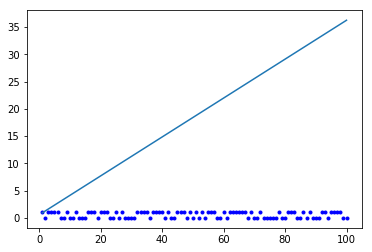

In [23]:
# Plot fit
x = 1 * np.linspace(1,100,100)
fx = n_param[1] * x + n_param[0]
plt.scatter(x, y, marker='.', color='b')
plt.plot(x,fx)
plt.show()

### Poisson Distribution

Let $Y \sim Poisson(\lambda)$, where the canonical link function is defined as $ \log(\mu) = X\beta$

In [15]:
# Simulate data with Poisson error distribution

x = np.linspace(0,10,100)

beta0 = 1
beta1 = 0.5

mu = np.exp(beta0 + beta1*x)
y = np.random.poisson(mu)

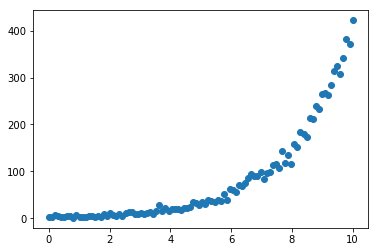

In [16]:
plt.scatter(x,y)
plt.show()

### Bernoulli Distribution

Let $Y \sim Bernoulli(p)$, where the canonical link function is defined as $ \log(\frac{\mu}{(1 - \mu)}) = X\beta$

In [17]:
X = np.random.randn(100)

beta0 = 1
beta1 = 5

mu = 1 / (1 + np.exp(-(beta0 + beta1*X)))

for i in range(0, len(mu)):
    y[i] = np.random.binomial(1, mu[i])

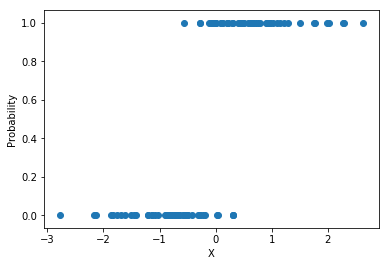

In [18]:
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('Probability')

plt.show()